In [84]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.special import logit, expit

For every $x = 0, 1, 2, \dots, 24$ let's draw a uniformly distributed random variable between 0 and 1 (probability), and logit transform it:

In [162]:
N = 25
y = np.sort(logit(rnd.uniform(0, 1, size=N)))
x = np.sort(logit(rnd.uniform(0, 1, size=N)))

This is what the data looks like:

Text(0, 0.5, 'logit(y)')

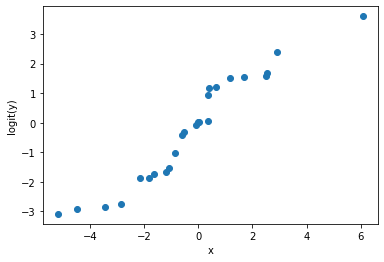

In [163]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('logit(y)')

In [164]:
st.linregress(x, y)

LinregressResult(slope=0.7249834947140096, intercept=-0.043115979527360765, rvalue=0.9598024275236957, pvalue=3.478887573687856e-14, stderr=0.044206732582313155)

In [165]:
sigma = y.std()
y_resamp = np.array([rnd.normal(yi, sigma, size=1000) for yi in y]).T

Text(0, 0.5, 'slope')

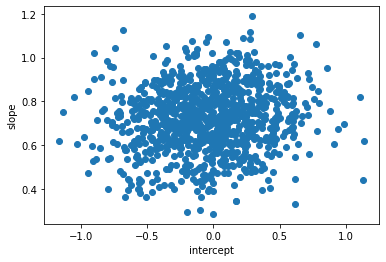

In [166]:
reg = (st.linregress(x, yi) for yi in y_resamp)
reg = np.array([(r.intercept, r.slope) for r in reg], dtype=np.float64).T
plt.scatter(reg[0], reg[1])
plt.xlabel('intercept')
plt.ylabel('slope')

In [167]:
reg.mean(axis=1)

array([-0.04680071,  0.72460794])

In [159]:
mu = y.mean()
sigma = y.std()
y_res = np.array([rnd.normal(mu, sigma, size=1000) for _ in y]).T

Text(0, 0.5, 'slope')

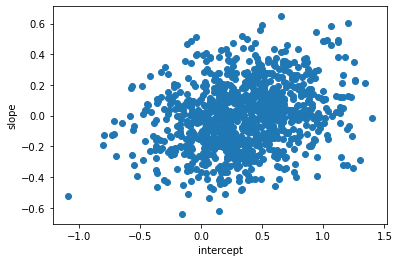

In [160]:
reg = (st.linregress(x, yj) for yj in y_res)
reg = np.array([(r.intercept, r.slope) for r in reg], dtype=np.float64).T
plt.scatter(reg[0], reg[1])
plt.xlabel('intercept')
plt.ylabel('slope')

In [161]:
np.corrcoef(reg[0], reg[1]) 

array([[1.       , 0.2475113],
       [0.2475113, 1.       ]])